# Fudan PRML 23Spring Assignment1

<font color='orange'>*Your Name, Student ID and Date: Êú±Â•ïÊñ∞, 19307090029, 2023/04/11*</font>    

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission.*

<font color='red' size = 3> *DDL: 2023.04.16 23:59* </font>

## 1. FDUML: your toy sklearn-like machine learning library (40 points)

In this assignment, you will fist implement your own sklearn-like machine learning library with `numpy`, named `fduml`.

sklearn: [scikit-learn: Machine Learning in Python](https://scikit-learn.org/stable/#)

In [362]:
# setup code, auto reload your .py file
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [363]:
# numpy
import numpy as np
np.random.seed(233)

In [364]:
# matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

You have to impletement several standard regression and classification methods in the `./fduml` folder:
1.   Linear Regression (10 points)
2.   kNN Classification (10 points)
3.   DecisionTree Classification (10 points)
4.   Softmax Classification (10 points)

We have written most of the code for you already, and you only need to fill in the most essential parts. We have also prepared several test cases for you to check if your code works correctly.

Furthermore, you can also test the accuracy of your code by comparing its output with the output of sk-learn.

<font color='orange'>‰ª•‰∏ä‰ª£Á†ÅÈÉΩÂ∑≤ÂÆåÊàêÔºåÂπ∂ÈÄöËøáÂØπÂ∫îtestÊñá‰ª∂Â§π‰∏ãÁöÑÊµãËØïÁî®‰æã„ÄÇ</font>

In [365]:
# ÂØºÂÖ•fdumlÂíåsklearn
# Â∞ÜÊù•ÁöÑÂÆûÈ™å‰∏≠‰ºöÊØîËæÉ‰∏§ËÄÖÁöÑÁªìÊûú
from fduml import *
import sklearn as skl

## 2. Optimization and Regularization (10 points)

To help you better understand the two fundamental concepts of `optimization` and `generalization` in machine learning, we have prepared a small experiment for you.

This section will make use of the `linear regression` algorithm that you have previously written. If you find that you need to improve your previous code to complete this section, you can go back and modify it.

**Dataset Construction**

We create a toy dataset for you sampled from the sin function (with Gaussian noise):

In [366]:
import math

# sin
def sin(x):
    y = np.sin(2 * math.pi * x)
    return y

In [367]:
def create_toy_data(func, interval, sample_num, noise = 0.0, add_outlier = False, outlier_ratio = 0.001):
    """
    generate data with the given function
    
    inputÔºö
       - funcÔºöthe input function
       - intervalÔºö the range of values of x, a tuple (start, end)
       - sample_numÔºö number of samples
       - noiseÔºö the standard deviation of Gaussian noise
       - add_outlierÔºöwhether to generate outliers
       - outlier_ratioÔºöproportion of outliers
       
    outputÔºö
       - X: samplesÔºåshape = [n_samples,1]
       - y: labelsÔºåshape = [n_samples,1]
    """
    
    X = np.random.rand(sample_num,1) * (interval[1]-interval[0]) + interval[0]
    y = func(X)

    # add Gaussian noise
    epsilon = np.random.normal(0, noise, (sample_num,1))
    y = y + epsilon
    
    # add outlier ÂºÇÂ∏∏ÂÄº
    if add_outlier:
        outlier_num = int(sample_num * outlier_ratio)
        if outlier_num != 0:
            outlier_idx = np.random.randint(sample_num, size = [outlier_num,1])
            y[outlier_idx] = y[outlier_idx] * 5 # ÈöèÊú∫ÈÄâÂèñindexÔºå5ÂÄçÂºÇÂ∏∏ÂÄº
            
    return X, y

In [368]:
import math

# sin
def sin(x):
    y = np.sin(2 * math.pi * x)
    return y

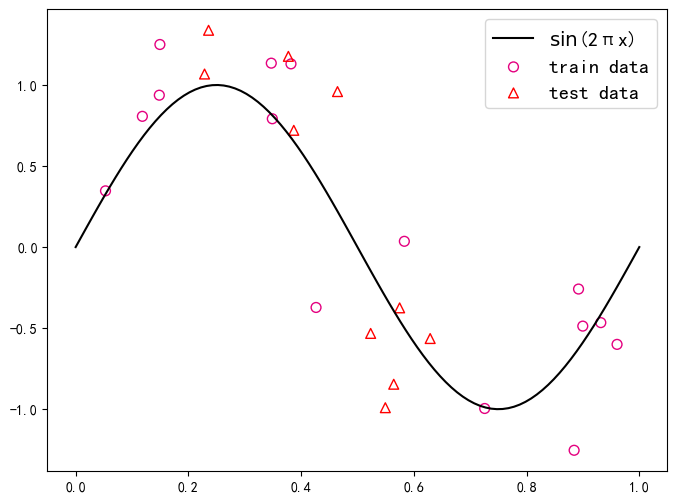

In [369]:
# generate toy dataset
func = sin
interval = (0,1)
train_num = 15
test_num = 10
noise = 0.5
X_train, y_train = create_toy_data(func=func, interval=interval, sample_num=train_num, noise = noise)
X_test, y_test = create_toy_data(func=func, interval=interval, sample_num=test_num, noise = noise)

X_underlying = np.linspace(interval[0],interval[1],num=100)
y_underlying = sin(X_underlying)

# plot
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(X_underlying, y_underlying, c='#000000', label=r"$\sin(2\pi x)$")
plt.scatter(X_train, y_train, facecolor="none", edgecolor='#e4007f', s=50, label="train data")
plt.scatter(X_test, y_test, facecolor="none", edgecolor="r", marker = '^', s=50, label="test data")
plt.legend(fontsize='x-large')
plt.rc('axes', unicode_minus=False)
plt.show()

**Your Tasks (10 points)**

1) Take the `linear regression algorithm` you implemented with a `polynomial basis function` to implement a `polynomial regression algorithm` to fit the above training data;    
2) Test the performance of the fitted model on the training set and test set (mean squared error);      
3) Degrees of polynomials you need to try at least: 0, 1, 3, 8, 12;    
4) You should also try polynomial regression with a regularization term;   
5) You need to visualize the fitted function;

Write your implementation code below or in `fduml`, please write comments:

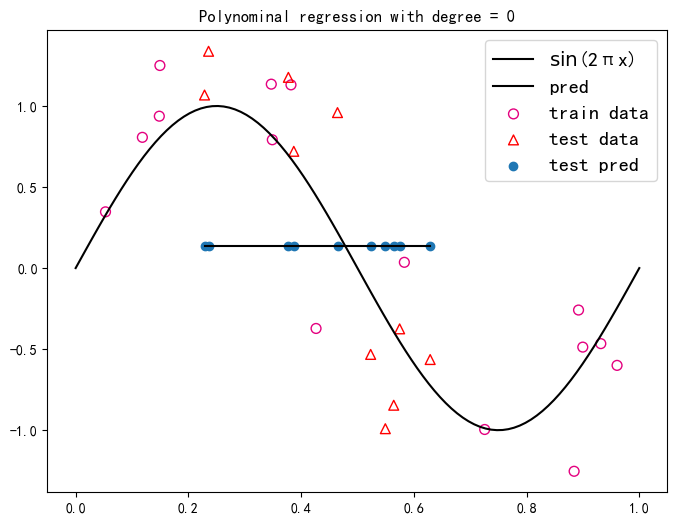

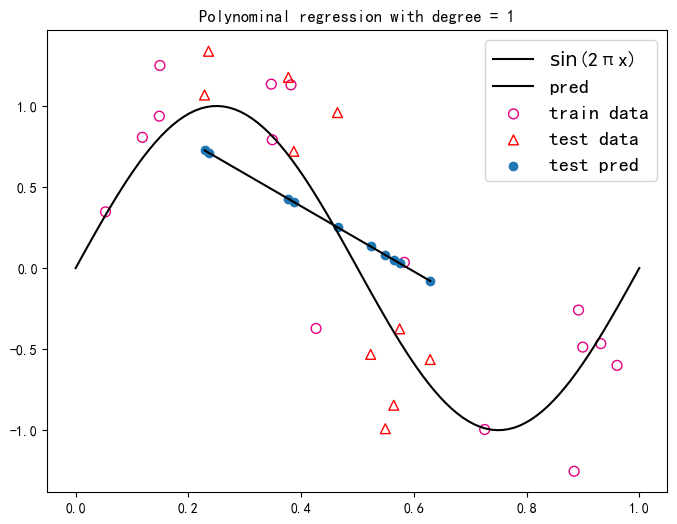

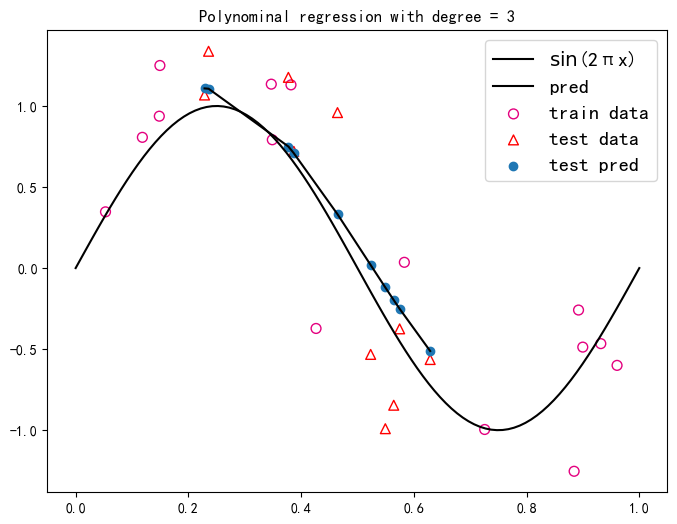

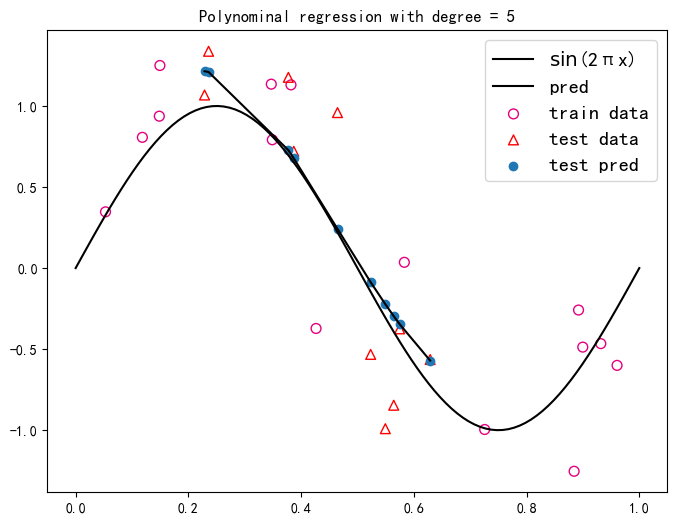

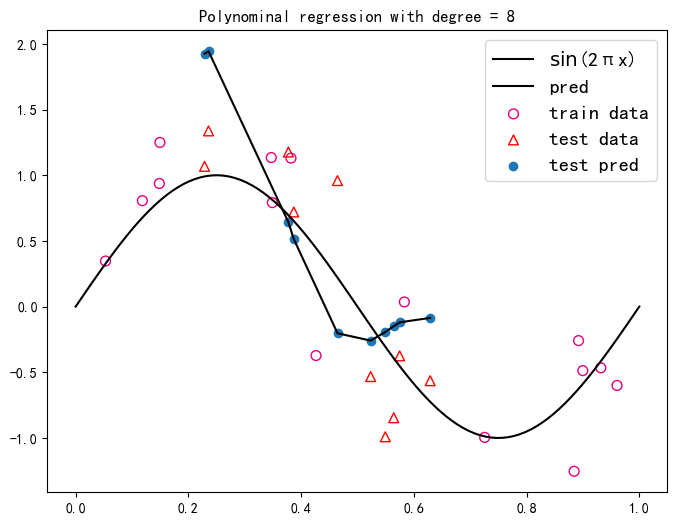

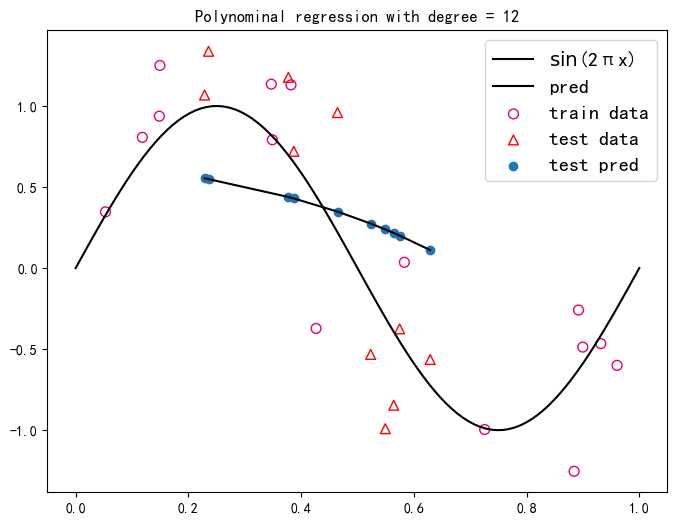

In [370]:
# the self-made polynomial regression model is in the module below
from fduml.linear_model.polynominal_reg import PolynominalRegression
def polyRegressionAndDraw(degree):
    # fit using polynomial regression
    # if there is no enough rank, will use redge regression as regularization term
    model = PolynominalRegression()
    model.fit(X_train, y_train, degree)

    # predict
    y_test_pred = model.predict(X_test, degree)
    idx = np.argsort(X_test, axis=0)

    # ÂØπxÂíåyËøõË°åÊéíÂ∫è
    X_test_sorted = X_test[idx].flatten()
    y_test_pred_sorted = y_test_pred[idx].flatten()


    # use plot to output the result
    plt.rcParams['figure.figsize'] = (8.0, 6.0)
    plt.plot(X_underlying, y_underlying, c='#000000', label=r"$\sin(2\pi x)$")
    plt.scatter(X_train, y_train, facecolor="none", edgecolor='#e4007f', s=50, label="train data")
    plt.scatter(X_test, y_test, facecolor="none", edgecolor="r", marker = '^', s=50, label="test data")
    plt.scatter(X_test, y_test_pred, label="test pred")
    plt.plot(X_test_sorted, y_test_pred_sorted, c='#000000', label=r"pred")
    plt.legend(fontsize='x-large')
    plt.title('Polynominal regression with degree = {}'.format(degree))
    plt.rc('axes', unicode_minus=False)
    plt.show()

polyRegressionAndDraw(0)
polyRegressionAndDraw(1)
polyRegressionAndDraw(3)
polyRegressionAndDraw(5)
polyRegressionAndDraw(8)
polyRegressionAndDraw(12)




## 3. Machine Learning with Tabular Data (50 points)

### 1) Task Introduction

In this section, you will use the algorithms you implemented to solve more realistic tasks.

You are given a dataset of heart attack predictions. For each patient, there are some characteristics of him/her in the dataset. Your task is to build a machine learning model to predict whether he/she has heart disease based on these features.

### 2) Dataset Introduction

The training and testing datasets are in the `dataset` folder.

The following is an introduction to the attributes in the dataset:

-   Age : Age of the patient

-   Sex : Sex of the patient (1:male, 0:female)

-   cp : Chest Pain type

    -   Value 0: typical angina

    -   Value 1: atypical angina

    -   Value 2: non-anginal pain

    -   Value 3: asymptomatic

-   trtbps : resting blood pressure (in mm Hg)

-   chol: cholesterol in mg/dl fetched via BMI sensor

-   fbs: (fasting blood sugar > 120 mg/dl)

    -   1 = true

    -   0 = false

-   rest_ecg: resting electrocardiographic results

    -   Value 0: normal

    -   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

    -   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

-   thalach: maximum heart rate achieved

-   exang: exercise induced angina

    -   1 = yes

    -   0 = no

-   old peak: ST depression induced by exercise relative to rest

-   slp: the slope of the peak exercise ST segment

    -   0 = unsloping

    -   1 = flat

    -   2 = downsloping

-   caa: number of major vessels (0-3)

-   thall : thalassemia

    -   0 = null

    -   1 = fixed defect

    -   2 = normal

    -   3 = reversable defect

-   output: diagnosis of heart disease (angiographic disease status)

    -   0: < 50% diameter narrowing. less chance of heart disease

    -   1: > 50% diameter narrowing. more chance of heart disease

### 3) Load Your Dataset

Different people may be assigned different datasets, please write your training dataset number here:<font color='red'> *[train0]* </font>

In [371]:
import pandas as pd
# load dataset from csv file
def load_data(path):
    """
    load dataset from csv file
    
    inputÔºö
       - pathÔºöthe path of csv file
       
    outputÔºö
       - X_train: training samplesÔºåshape = [n_samples,n_features]
       - y_train: training labelsÔºåshape = [n_samples,n_features]
       - X_test: testing samplesÔºåshape = [n_samples,n_features]
       - y_test: testing labelsÔºåshape = [n_samples,n_features]
    """
    data = pd.read_csv(path,header=0, index_col=0)
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    

    return X, y

X_train, y_train = load_data('dataset/train0.csv')
X_test, y_test = load_data('dataset/test.csv')


### 4) Exploratory Data Analysis (5 points)

Data is an important part of machine learning, and many people tend to ignore the analysis of data. In this part of the assignment, you will first conduct [exploratory data analysis (EDA)](https://en.wikipedia.org/wiki/Exploratory_data_analysis) on your given dataset. More analysis is encourages. More than statistics and figures, it is better to draw some conclusions from that. 

Such analysis helps you to know the distribution of your data. Besides, it may also help you find out the **TRAPS** inside the data.
If you find any TRAPS, report the detail of them and how you will alleviate the harm they bring. You don't need to do much processing on the TRAPS here, you only need to perform statistical analysis on the data.

In [372]:
import scipy.stats as stats

# we have got X_train and y_train, and we can use data mining such as PCA
# exploratory data analysis
# explore each column of X_train

# age
print("ÂºÄÂßãÊ£ÄÈ™åageÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß")
age = X_train['age']
output = y_train
r, p = stats.pointbiserialr(age, output)
print("ÁÇπÂèåÂàóÁõ∏ÂÖ≥Á≥ªÊï∞‰∏∫Ôºö", r)
print("pÂÄº‰∏∫Ôºö", p)
print(" ")



ÂºÄÂßãÊ£ÄÈ™åageÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß
ÁÇπÂèåÂàóÁõ∏ÂÖ≥Á≥ªÊï∞‰∏∫Ôºö -0.09031878590864709
pÂÄº‰∏∫Ôºö 0.2716942556326177
 


In [373]:
# sex
print("ÂºÄÂßãÊ£ÄÈ™åsexÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß")
sex = X_train['sex']
output = y_train
table = pd.crosstab(sex, output)
chi2, p, dof, expected = stats.chi2_contingency(table)
print('ÂÆûÈôÖÈ¢ëÊï∞‰∏∫Ôºö', table)
print('Âç°ÊñπÂÄº‰∏∫Ôºö', chi2)
print('pÂÄº‰∏∫Ôºö', p)
print('Ëá™Áî±Â∫¶‰∏∫Ôºö', dof)
print('ÊúüÊúõÈ¢ëÊï∞‰∏∫Ôºö\n', expected)
print(" ")

ÂºÄÂßãÊ£ÄÈ™åsexÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß
ÂÆûÈôÖÈ¢ëÊï∞‰∏∫Ôºö output   0   1
sex           
0       21  17
1       99  13
Âç°ÊñπÂÄº‰∏∫Ôºö 17.448161419172934
pÂÄº‰∏∫Ôºö 2.9524970942445185e-05
Ëá™Áî±Â∫¶‰∏∫Ôºö 1
ÊúüÊúõÈ¢ëÊï∞‰∏∫Ôºö
 [[30.4  7.6]
 [89.6 22.4]]
 


In [374]:
# cp
print("ÂºÄÂßãÊ£ÄÈ™åcpÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß")
cp = X_train['cp']
output = y_train
table = pd.crosstab(cp, output)
chi2, p, dof, expected = stats.chi2_contingency(table)
print('ÂÆûÈôÖÈ¢ëÊï∞‰∏∫Ôºö', table)
print('Âç°ÊñπÂÄº‰∏∫Ôºö', chi2)
print('pÂÄº‰∏∫Ôºö', p)
print('Ëá™Áî±Â∫¶‰∏∫Ôºö', dof)
print('ÊúüÊúõÈ¢ëÊï∞‰∏∫Ôºö\n', expected)
print(" ")


ÂºÄÂßãÊ£ÄÈ™åcpÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß
ÂÆûÈôÖÈ¢ëÊï∞‰∏∫Ôºö output   0   1
cp            
0       92   7
1        9   8
2       14  13
3        5   2
Âç°ÊñπÂÄº‰∏∫Ôºö 31.814645049939166
pÂÄº‰∏∫Ôºö 5.725979680570038e-07
Ëá™Áî±Â∫¶‰∏∫Ôºö 3
ÊúüÊúõÈ¢ëÊï∞‰∏∫Ôºö
 [[79.2 19.8]
 [13.6  3.4]
 [21.6  5.4]
 [ 5.6  1.4]]
 


In [375]:
# trtbps
print("ÂºÄÂßãÊ£ÄÈ™åtrtbpsÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß")
trtbps = X_train['trtbps']
output = y_train
r, p = stats.pointbiserialr(trtbps, output)
print("ÁÇπÂèåÂàóÁõ∏ÂÖ≥Á≥ªÊï∞‰∏∫Ôºö", r)
print("pÂÄº‰∏∫Ôºö", p)
print(" ")

ÂºÄÂßãÊ£ÄÈ™åtrtbpsÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß
ÁÇπÂèåÂàóÁõ∏ÂÖ≥Á≥ªÊï∞‰∏∫Ôºö -0.08559277415946513
pÂÄº‰∏∫Ôºö 0.2976731442560016
 


In [376]:
# chol
print("ÂºÄÂßãÊ£ÄÈ™åcholÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß")
chol = X_train['chol']
output = y_train
r, p = stats.pointbiserialr(chol, output)
print("ÁÇπÂèåÂàóÁõ∏ÂÖ≥Á≥ªÊï∞‰∏∫Ôºö", r)
print("pÂÄº‰∏∫Ôºö", p)
print(" ")

ÂºÄÂßãÊ£ÄÈ™åcholÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß
ÁÇπÂèåÂàóÁõ∏ÂÖ≥Á≥ªÊï∞‰∏∫Ôºö -0.030027433839041655
pÂÄº‰∏∫Ôºö 0.7152866432104635
 


In [377]:
# fbs
print("ÂºÄÂßãÊ£ÄÈ™åfbsÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß")
fbs = X_train['fbs']
output = y_train
table = pd.crosstab(fbs, output)
chi2, p, dof, expected = stats.chi2_contingency(table)
print('ÂÆûÈôÖÈ¢ëÊï∞‰∏∫Ôºö', table)
print('Âç°ÊñπÂÄº‰∏∫Ôºö', chi2)
print('pÂÄº‰∏∫Ôºö', p)
print('Ëá™Áî±Â∫¶‰∏∫Ôºö', dof)
print('ÊúüÊúõÈ¢ëÊï∞‰∏∫Ôºö\n', expected)
print(" ")

ÂºÄÂßãÊ£ÄÈ™åfbsÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß
ÂÆûÈôÖÈ¢ëÊï∞‰∏∫Ôºö output    0   1
fbs            
0       101  28
1        19   2
Âç°ÊñπÂÄº‰∏∫Ôºö 1.0001384274640088
pÂÄº‰∏∫Ôºö 0.3172770147873324
Ëá™Áî±Â∫¶‰∏∫Ôºö 1
ÊúüÊúõÈ¢ëÊï∞‰∏∫Ôºö
 [[103.2  25.8]
 [ 16.8   4.2]]
 


In [378]:
# restecg
print("ÂºÄÂßãÊ£ÄÈ™årestecgÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß")
restecg = X_train['restecg']
output = y_train
table = pd.crosstab(restecg, output)
chi2, p, dof, expected = stats.chi2_contingency(table)
print('ÂÆûÈôÖÈ¢ëÊï∞‰∏∫Ôºö', table)
print('Âç°ÊñπÂÄº‰∏∫Ôºö', chi2)
print('pÂÄº‰∏∫Ôºö', p)
print('Ëá™Áî±Â∫¶‰∏∫Ôºö', dof)
print('ÊúüÊúõÈ¢ëÊï∞‰∏∫Ôºö\n', expected)
print(" ")

ÂºÄÂßãÊ£ÄÈ™årestecgÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß
ÂÆûÈôÖÈ¢ëÊï∞‰∏∫Ôºö output    0   1
restecg        
0        67  11
1        50  19
2         3   0
Âç°ÊñπÂÄº‰∏∫Ôºö 4.894788182831661
pÂÄº‰∏∫Ôºö 0.08651875295136213
Ëá™Áî±Â∫¶‰∏∫Ôºö 2
ÊúüÊúõÈ¢ëÊï∞‰∏∫Ôºö
 [[62.4 15.6]
 [55.2 13.8]
 [ 2.4  0.6]]
 


In [379]:
# thalachh
print("ÂºÄÂßãÊ£ÄÈ™åthalachhÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß")
thalachh = X_train['thalachh']
output = y_train
r, p = stats.pointbiserialr(thalachh, output)
print("ÁÇπÂèåÂàóÁõ∏ÂÖ≥Á≥ªÊï∞‰∏∫Ôºö", r)
print("pÂÄº‰∏∫Ôºö", p)
print(" ")

ÂºÄÂßãÊ£ÄÈ™åthalachhÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß
ÁÇπÂèåÂàóÁõ∏ÂÖ≥Á≥ªÊï∞‰∏∫Ôºö 0.3064421195273851
pÂÄº‰∏∫Ôºö 0.00013678469953564586
 


In [380]:
# exng
print("ÂºÄÂßãÊ£ÄÈ™åexngÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß")
exng = X_train['exng']
output = y_train
table = pd.crosstab(exng, output)
chi2, p, dof, expected = stats.chi2_contingency(table)
print('ÂÆûÈôÖÈ¢ëÊï∞‰∏∫Ôºö', table)
print('Âç°ÊñπÂÄº‰∏∫Ôºö', chi2)
print('pÂÄº‰∏∫Ôºö', p)
print('Ëá™Áî±Â∫¶‰∏∫Ôºö', dof)
print('ÊúüÊúõÈ¢ëÊï∞‰∏∫Ôºö\n', expected)
print(" ")

ÂºÄÂßãÊ£ÄÈ™åexngÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß
ÂÆûÈôÖÈ¢ëÊï∞‰∏∫Ôºö output   0   1
exng          
0       53  26
1       67   4
Âç°ÊñπÂÄº‰∏∫Ôºö 15.726399536459262
pÂÄº‰∏∫Ôºö 7.31954443670838e-05
Ëá™Áî±Â∫¶‰∏∫Ôºö 1
ÊúüÊúõÈ¢ëÊï∞‰∏∫Ôºö
 [[63.2 15.8]
 [56.8 14.2]]
 


In [381]:
# oldpeak
print("ÂºÄÂßãÊ£ÄÈ™åoldpeakÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß")
oldpeak = X_train['oldpeak']
output = y_train
r, p = stats.pointbiserialr(oldpeak, output)
print("ÁÇπÂèåÂàóÁõ∏ÂÖ≥Á≥ªÊï∞‰∏∫Ôºö", r)
print("pÂÄº‰∏∫Ôºö", p)
print(" ")

ÂºÄÂßãÊ£ÄÈ™åoldpeakÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß
ÁÇπÂèåÂàóÁõ∏ÂÖ≥Á≥ªÊï∞‰∏∫Ôºö -0.3609159621239378
pÂÄº‰∏∫Ôºö 5.700472830337443e-06
 


In [382]:
# slp
print("ÂºÄÂßãÊ£ÄÈ™åslpÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß")
slp = X_train['slp']
output = y_train
table = pd.crosstab(slp, output)
chi2, p, dof, expected = stats.chi2_contingency(table)
print('ÂÆûÈôÖÈ¢ëÊï∞‰∏∫Ôºö', table)
print('Âç°ÊñπÂÄº‰∏∫Ôºö', chi2)
print('pÂÄº‰∏∫Ôºö', p)
print('Ëá™Áî±Â∫¶‰∏∫Ôºö', dof)
print('ÊúüÊúõÈ¢ëÊï∞‰∏∫Ôºö\n', expected)
print(" ")

ÂºÄÂßãÊ£ÄÈ™åslpÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß
ÂÆûÈôÖÈ¢ëÊï∞‰∏∫Ôºö output   0   1
slp           
0       11   1
1       78   6
2       31  23
Âç°ÊñπÂÄº‰∏∫Ôºö 26.92625661375661
pÂÄº‰∏∫Ôºö 1.4224521536908713e-06
Ëá™Áî±Â∫¶‰∏∫Ôºö 2
ÊúüÊúõÈ¢ëÊï∞‰∏∫Ôºö
 [[ 9.6  2.4]
 [67.2 16.8]
 [43.2 10.8]]
 


In [383]:
# caa
print("ÂºÄÂßãÊ£ÄÈ™åcaaÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß")
caa = X_train['caa']
output = y_train
table = pd.crosstab(caa, output)
chi2, p, dof, expected = stats.chi2_contingency(table)
print('ÂÆûÈôÖÈ¢ëÊï∞‰∏∫Ôºö', table)
print('Âç°ÊñπÂÄº‰∏∫Ôºö', chi2)
print('pÂÄº‰∏∫Ôºö', p)
print('Ëá™Áî±Â∫¶‰∏∫Ôºö', dof)
print('ÊúüÊúõÈ¢ëÊï∞‰∏∫Ôºö\n', expected)
print(" ")

ÂºÄÂßãÊ£ÄÈ™åcaaÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß
ÂÆûÈôÖÈ¢ëÊï∞‰∏∫Ôºö output   0   1
caa           
0       44  21
1       40   4
2       24   3
3       12   0
4        0   2
Âç°ÊñπÂÄº‰∏∫Ôºö 21.75990675990676
pÂÄº‰∏∫Ôºö 0.00022372319871280302
Ëá™Áî±Â∫¶‰∏∫Ôºö 4
ÊúüÊúõÈ¢ëÊï∞‰∏∫Ôºö
 [[52.  13. ]
 [35.2  8.8]
 [21.6  5.4]
 [ 9.6  2.4]
 [ 1.6  0.4]]
 


In [384]:
# thall
print("ÂºÄÂßãÊ£ÄÈ™åthallÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß")
thall = X_train['thall']
output = y_train
table = pd.crosstab(thall, output)
chi2, p, dof, expected = stats.chi2_contingency(table)
print('ÂÆûÈôÖÈ¢ëÊï∞‰∏∫Ôºö', table)
print('Âç°ÊñπÂÄº‰∏∫Ôºö', chi2)
print('pÂÄº‰∏∫Ôºö', p)
print('Ëá™Áî±Â∫¶‰∏∫Ôºö', dof)
print('ÊúüÊúõÈ¢ëÊï∞‰∏∫Ôºö\n', expected)
print(" ")

ÂºÄÂßãÊ£ÄÈ™åthallÂíåoutput‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß
ÂÆûÈôÖÈ¢ëÊï∞‰∏∫Ôºö output   0   1
thall         
0        1   0
1       12   0
2       32  27
3       75   3
Âç°ÊñπÂÄº‰∏∫Ôºö 40.44573011734029
pÂÄº‰∏∫Ôºö 8.571618760993979e-09
Ëá™Áî±Â∫¶‰∏∫Ôºö 3
ÊúüÊúõÈ¢ëÊï∞‰∏∫Ôºö
 [[ 0.8  0.2]
 [ 9.6  2.4]
 [47.2 11.8]
 [62.4 15.6]]
 


<font color='orange'>Therefore, we can conclude that following features are important for heart disease prediction:

<font color='red'>sex, cp, thalach, exang, oldpeak, slp, caa, thall</font>


This is because these features have the highest correlation with the output.</font>

### 5) Build Your Baselines (15 points)

You need to use at least three algorithms of `kNN`, `decision tree`, and `logistic regression` to complete this task.

The following code may include data processing, model building, model training, model evaluation and other parts. You can also organize this part of code according to your ideas.    
You may need to build the validation set yourself.  
You can test whether your model can fit a few samples first, and then test on the full dataset.  
You may need to test the speed of the vectorized implementation of several algorithms.    
Visualization is encouraged.   
Please follow standard machine learning procedures, i.e. you CANNOT use the test set at any time to tune the parameters of the model. 

Note: *This section mainly verifies the correctness of your previous code and gets the baseline results.*

In [385]:
# data processing
# ÊöÇÊó∂‰∏çÁî®ÔºåÂ∞ÜÂú®Êé¢Á¥¢ÈÉ®ÂàÜËÄÉËôëÊï∞ÊçÆÂΩí‰∏ÄÂåñÁ≠âÊìç‰Ωú

**a) kNN**

ÂºÄÂßã‰ΩøÁî®fduml.knnÂØπthalachÂíåoldpeakËøõË°åÂ§ÑÁêÜ
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫25Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫54.35%


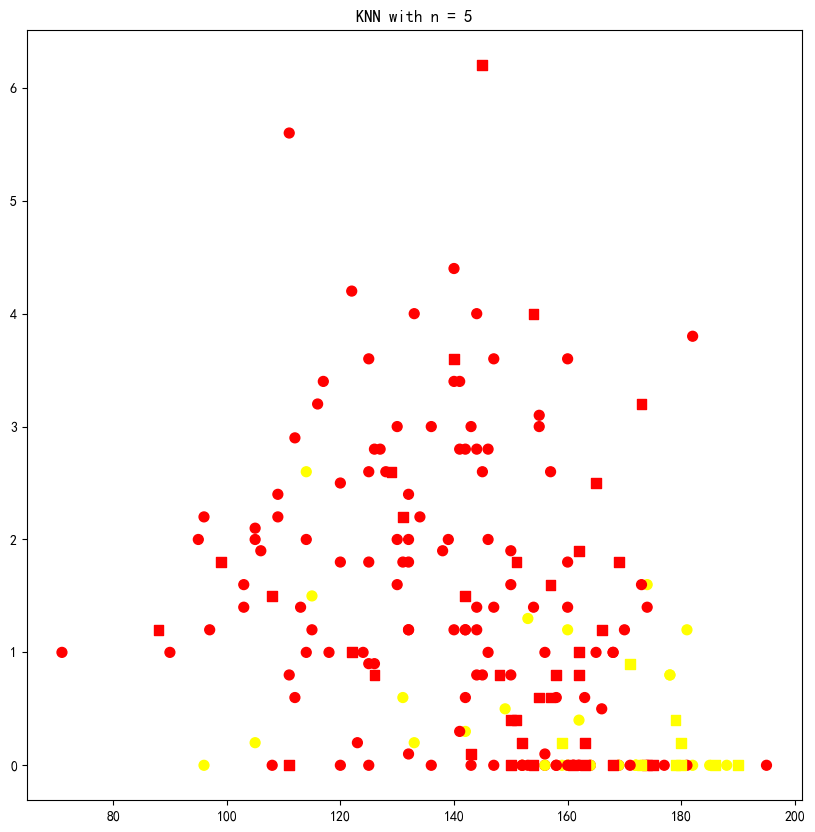

(25,
 46,
 0.5434782608695652,
 array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [386]:
from sklearn.preprocessing import normalize
# use fduml.knn on thalach and oldpeak
def useKnnAndDraw(n=3, draw=True):
    print("ÂºÄÂßã‰ΩøÁî®fduml.knnÂØπthalachÂíåoldpeakËøõË°åÂ§ÑÁêÜ")
    thalachh = X_train['thalachh']
    oldpeak = X_train['oldpeak']
    X_knn  = pd.DataFrame({'thalachh': thalachh.values, 'oldpeak': oldpeak.values}).to_numpy()
    # X_knn = normalize(X_knn, axis=0)

    thalachh_test = X_test['thalachh']
    oldpeak_test = X_test['oldpeak']
    X_knn_test = pd.DataFrame({'thalachh': thalachh_test.values, 'oldpeak': oldpeak_test.values}).to_numpy()
    # X_knn_test = normalize(X_knn_test, axis=0)

    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_knn, y_train)
    y_pred = knn.predict(X_knn_test)
    print(y_pred)

    same = np.sum(y_pred == y_test) # count how many elements are equal
    total = np.size(y_pred) # get the total number of elements
    ratio = same / total # calculate the proportion of equal elements
    print('Ê≠£Á°Æ‰∏™Êï∞‰∏∫{}Ôºå ÊÄª‰∏™Êï∞‰∏∫{}Ôºå Ê≠£Á°ÆÁéá‰∏∫{:.2f}%'.format(same, total, ratio * 100))

    if(draw):
        # plot the result
        plt.figure(figsize=(10, 10))
        plt.scatter(X_knn[:, 0], X_knn[:, 1], c=y_train, s=50, cmap='autumn', label='train data')
        plt.scatter(X_knn_test[:, 0], X_knn_test[:, 1], c=y_pred, s=50, cmap='autumn', marker='s', label='test data')
        plt.title('KNN with n = {}'.format(n))
        plt.show()

    return same, total, ratio, y_pred

useKnnAndDraw(5, draw=True)


<font color='orange'> 
‰∏äÂõæ‰∏≠ÂΩ¢Ë±°Âåñ‰∫ÜKNNÁÆóÊ≥ïÁöÑ‰ΩøÁî®ÔºåÂúÜÂΩ¢Ë°®Á§∫ÁöÑÊòØËÆ≠ÁªÉÊï∞ÊçÆÔºåÊ≠£ÊñπÂΩ¢Ë°®Á§∫ÁöÑÊòØÊµãËØïÊï∞ÊçÆ„ÄÇ


ÂØπ‰∫éËÆ≠ÁªÉÊï∞ÊçÆÔºåÁ∫¢Ëâ≤Ë°®Á§∫output=0ÔºåÈªÑËâ≤Ë°®Á§∫output=1„ÄÇ

ÂØπ‰∫éÊµãËØïÊï∞ÊçÆÔºåÁ∫¢Ëâ≤Ë°®Á§∫È¢ÑÊµãÁªìÊûú‰∏∫0ÔºåÈªÑËâ≤Ë°®Á§∫È¢ÑÊµãÁªìÊûú‰∏∫1„ÄÇ
</font>

**b) Decision Tree**

In [387]:
# use decision tree on discrete variables
def useDecisionTree():
    print("ÂºÄÂßã‰ΩøÁî®fduml.decision_tree Â§ÑÁêÜsex, cp, exang, slp, caa")
    sex = X_train['sex']
    cp = X_train['cp']
    exng = X_train['exng']
    slp = X_train['slp']
    caa = X_train['caa']
    X_decision_tree = pd.DataFrame({'sex':sex.values, 'cp':cp.values, 'exng':exng.values, 'slp':slp.values, 'caa': caa.values}).to_numpy()

    sex_test = X_test['sex']
    cp_test = X_test['cp']
    exng_test = X_test['exng']
    slp_test = X_test['slp']
    caa_test = X_test['caa']
    X_decision_tree_test = pd.DataFrame({'sex':sex_test.values, 'cp':cp_test.values, 'exng':exng_test.values, 'slp':slp_test.values, 'caa': caa_test.values}).to_numpy()

    dt = DecisionTreeClassifier()
    dt.fit(X_decision_tree, y_train.to_numpy())
    y_pred = dt.predict(X_decision_tree_test)
    print(y_pred)

    same = np.sum(y_pred == y_test) # count how many elements are equal
    total = np.size(y_pred) # get the total number of elements
    ratio = same / total # calculate the proportion of equal elements
    print('Ê≠£Á°Æ‰∏™Êï∞‰∏∫{}Ôºå ÊÄª‰∏™Êï∞‰∏∫{}Ôºå Ê≠£Á°ÆÁéá‰∏∫{:.2f}%'.format(same, total, ratio * 100))

    return same, total, ratio, y_pred

useDecisionTree()

ÂºÄÂßã‰ΩøÁî®fduml.decision_tree Â§ÑÁêÜsex, cp, exang, slp, caa
[0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 1 0 0 1 1 0 0 0]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫26Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫56.52%


(26,
 46,
 0.5652173913043478,
 array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0]))

**c) Logistic Regression**

In [388]:
# use logistic regression to classify
print("ÂºÄÂßã‰ΩøÁî®fduml.logistc_regression Â§ÑÁêÜ")
def useLogisticRegression(learning_rate=2):
    sex = X_train['sex']
    cp = X_train['cp']
    exng = X_train['exng']
    slp = X_train['slp']
    caa = X_train['caa']
    X_lr = pd.DataFrame({'sex':sex.values, 'cp':cp.values, 'exng':exng.values, 'slp':slp.values, 'caa': caa.values}).to_numpy()

    sex_test = X_test['sex']
    cp_test = X_test['cp']
    exng_test = X_test['exng']
    slp_test = X_test['slp']
    caa_test = X_test['caa']
    X_lr_test = pd.DataFrame({'sex':sex_test.values, 'cp':cp_test.values, 'exng':exng_test.values, 'slp':slp_test.values, 'caa': caa_test.values}).to_numpy()


    lr =  SoftmaxClassifier(learning_rate=learning_rate, loss_type='naive')
    lr.fit(X_lr, y_train.to_numpy())
    y_pred = lr.predict(X_lr_test)
    print(y_pred)

    same = np.sum(y_pred == y_test) # count how many elements are equal
    total = np.size(y_pred) # get the total number of elements
    ratio = same / total # calculate the proportion of equal elements
    print('Ê≠£Á°Æ‰∏™Êï∞‰∏∫{}Ôºå ÊÄª‰∏™Êï∞‰∏∫{}Ôºå Ê≠£Á°ÆÁéá‰∏∫{:.2f}%'.format(same, total, ratio * 100))

    return same, total, ratio, y_pred

useLogisticRegression(2)

ÂºÄÂßã‰ΩøÁî®fduml.logistc_regression Â§ÑÁêÜ
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 0]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫27Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫58.70%


(27,
 46,
 0.5869565217391305,
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 0], dtype=int64))

### 6) Exploration (25 points)

Now that you have built your baselines, you need to improve your solution. You can do more processing on the data, improve the model, adjust the evaluation indicators, and so on. You can explore and analyze as much as you can below.

#### 1. ÂØπ‰∫éÊ®°ÂûãË∂ÖÂèÇÊï∞ÁöÑË∞ÉÊï¥

In [389]:
# KNN
# KNN ÁöÑË∂ÖÂèÇÊï∞Âú®‰∫én_neighborsÔºåËøôÈáå‰ΩøÁî®ÂÆûÈ™åÊù•ÊØîËæÉ‰∏çÂêåÁöÑn_neighborsÁöÑÂáÜÁ°ÆÁéá
for i in range(30):
    same, total, ratio, y_pred = useKnnAndDraw(i+1, False)
    print('n_neighbors = {}, Ê≠£Á°Æ‰∏™Êï∞‰∏∫{}Ôºå ÊÄª‰∏™Êï∞‰∏∫{}Ôºå Ê≠£Á°ÆÁéá‰∏∫{:.2f}%'.format(i+1, same, total, ratio * 100))

ÂºÄÂßã‰ΩøÁî®fduml.knnÂØπthalachÂíåoldpeakËøõË°åÂ§ÑÁêÜ
[0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫25Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫54.35%
n_neighbors = 1, Ê≠£Á°Æ‰∏™Êï∞‰∏∫25Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫54.35%
ÂºÄÂßã‰ΩøÁî®fduml.knnÂØπthalachÂíåoldpeakËøõË°åÂ§ÑÁêÜ
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫21Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫45.65%
n_neighbors = 2, Ê≠£Á°Æ‰∏™Êï∞‰∏∫21Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫45.65%
ÂºÄÂßã‰ΩøÁî®fduml.knnÂØπthalachÂíåoldpeakËøõË°åÂ§ÑÁêÜ
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫24Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫52.17%
n_neighbors = 3, Ê≠£Á°Æ‰∏™Êï∞‰∏∫24Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫52.17%
ÂºÄÂßã‰ΩøÁî®fdum

<font color='orange'>
Áî±Ê≠§ÂèØËßÅÔºåÂØπKNNÁÆóÊ≥ïÔºåË∂ÖÂèÇÊï∞ÁöÑÈÄâÊã©ÂΩ±Âìç‰∏çÂ§ßÔºå‰∏îÁúã‰∏çÂá∫ÊòéÊòæÁöÑËßÑÂæã„ÄÇ
</font>

In [390]:
# Logistic Regression
# Logistic Regression ÁöÑË∂ÖÂèÇÊï∞Âú®‰∫élearning_rateÔºåËøôÈáå‰ΩøÁî®ÂÆûÈ™åÊù•ÊØîËæÉ‰∏çÂêåÁöÑlearning_rateÁöÑÂáÜÁ°ÆÁéá
learning_rate = 0.00001
for i in range(30):
    learning_rate = learning_rate * 2
    same, total, ratio, y_pred = useLogisticRegression(learning_rate)
    print('learning_rate = {}, Ê≠£Á°Æ‰∏™Êï∞‰∏∫{}Ôºå ÊÄª‰∏™Êï∞‰∏∫{}Ôºå Ê≠£Á°ÆÁéá‰∏∫{:.2f}%'.format(learning_rate, same, total, ratio * 100))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫17Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫36.96%
learning_rate = 2e-05, Ê≠£Á°Æ‰∏™Êï∞‰∏∫17Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫36.96%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫18Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫39.13%
learning_rate = 4e-05, Ê≠£Á°Æ‰∏™Êï∞‰∏∫18Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫39.13%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫18Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫39.13%
learning_rate = 8e-05, Ê≠£Á°Æ‰∏™Êï∞‰∏∫18Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫39.13%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫18Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫39.13%
learning_rate = 0.00016, Ê≠£Á°Æ‰∏™Êï∞‰∏∫18Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫39.13%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

d:\Desktop\Â§ß‰∏â‰∏ãÂ≠¶Êúü\Ê®°ÂºèËØÜÂà´‰∏éÊú∫Âô®Â≠¶‰π†\practice\PRML-Spring23-FDU\PRML-Spring23-FDU\assignment1\fduml\linear_model\softmax.py:209: RuntimeWarning: divide by zero encountered in log
  loss += -np.log(p[y[i]])


[1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1
 1 1 0 0 1 1 0 0 0]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫35Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫76.09%
learning_rate = 167.77216, Ê≠£Á°Æ‰∏™Êï∞‰∏∫35Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫76.09%
[0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1
 1 1 0 0 1 1 0 0 0]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫33Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫71.74%
learning_rate = 335.54432, Ê≠£Á°Æ‰∏™Êï∞‰∏∫33Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫71.74%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫18Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫39.13%
learning_rate = 671.08864, Ê≠£Á°Æ‰∏™Êï∞‰∏∫18Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫39.13%
[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 0]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫28Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫60.87%
learning_rate = 1342.17728, Ê≠£Á°Æ‰∏™Êï∞‰∏∫28Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫60.87%
[1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 

<font color='orange'>
Áî±Ê≠§ÂèØËßÅÔºåÂØπlogistic regressionÁÆóÊ≥ïÔºåË∂ÖÂèÇÊï∞ÁöÑÈÄâÊã©ÂΩ±ÂìçËæÉÂ§ß„ÄÇÂΩìÂ≠¶‰π†ÁéáÂ§™Â§ßÊàñÂ§™Â∞èÊó∂ÔºåÊ®°ÂûãÊïàÊûúÈÉΩ‰∏çÂ•Ω„ÄÇ‰ΩÜÂ≠¶‰π†ÁéáÈÄÇ‰∏≠Êó∂ÔºåÊ®°ÂûãÊïàÊûúËæÉÂ•Ω„ÄÇ
</font>

#### 2. ÂØπ‰∫éÊï∞ÊçÆÁöÑÂΩí‰∏ÄÂåñ

<font color='orange'>
ÊàëÂáÜÂ§á‰ΩøÁî®scikit-learnÂ∫ì‰∏≠ÁöÑpreprocessing.normalize()ÂáΩÊï∞Êù•ÂÆûÁé∞Êï∞ÊçÆÂΩí‰∏ÄÂåñ„ÄÇ

normalize()ÂáΩÊï∞ÂèØ‰ª•ÂØπ‰∏Ä‰∏™Á±ª‰ººÊï∞ÁªÑÁöÑÊï∞ÊçÆÈõÜËøõË°åÂΩí‰∏ÄÂåñÔºåÂÆÉ‰ºöÂ∞ÜÊØè‰∏™ÂêëÈáèÂçïÁã¨Áº©ÊîæÂà∞‰∏Ä‰∏™Âçï‰ΩçËåÉÊï∞Ôºå‰ΩøÂæóÂêëÈáèÁöÑÈïøÂ∫¶‰∏∫1„ÄÇ

ËøôÊòØÂõ†‰∏∫ÂéüÂßãÊï∞ÊçÆ‰∏≠ÔºåÂêÑ‰∏™ÁâπÂæÅÁöÑÂèñÂÄºËåÉÂõ¥‰∏çÂêåÔºå‰ªéËÄåÂΩ±ÂìçÊ®°ÂûãÁöÑÂáÜÁ°ÆÊÄß„ÄÇ
</font>

ÂºÄÂßã‰ΩøÁî®fduml.knnÂØπthalachÂíåoldpeakËøõË°åÂ§ÑÁêÜ
[1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫31Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫67.39%


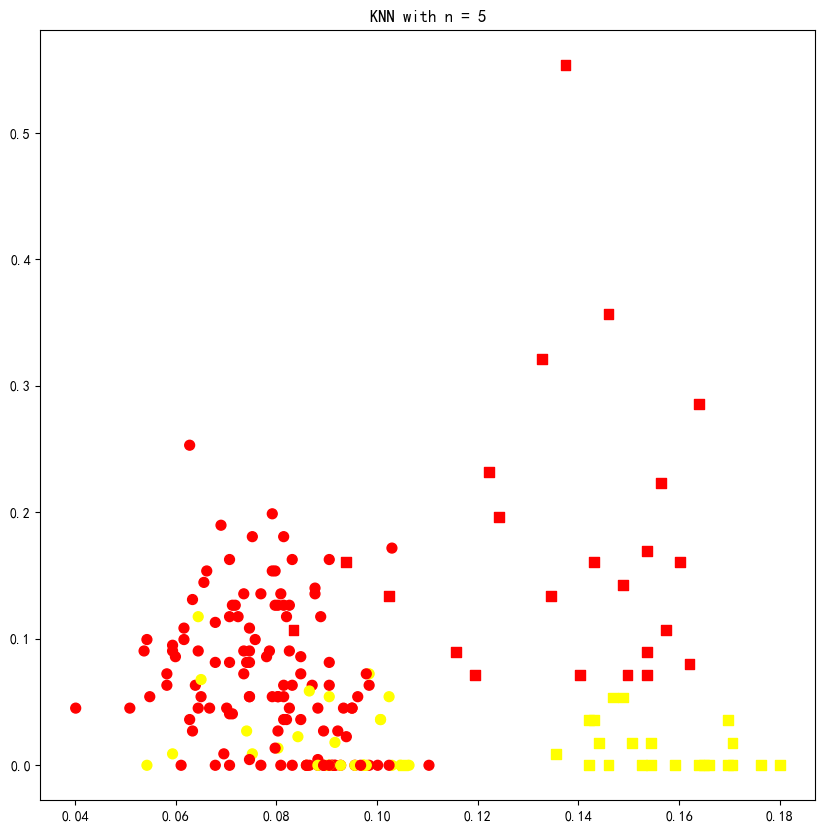

(31,
 46,
 0.6739130434782609,
 array([1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
        1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.]))

In [391]:
def useKnnNormalize(n=3, draw=True):
    print("ÂºÄÂßã‰ΩøÁî®fduml.knnÂØπthalachÂíåoldpeakËøõË°åÂ§ÑÁêÜ")
    thalachh = X_train['thalachh']
    oldpeak = X_train['oldpeak']
    X_knn  = pd.DataFrame({'thalachh': thalachh.values, 'oldpeak': oldpeak.values}).to_numpy()
    X_knn = normalize(X_knn, axis=0)

    thalachh_test = X_test['thalachh']
    oldpeak_test = X_test['oldpeak']
    X_knn_test = pd.DataFrame({'thalachh': thalachh_test.values, 'oldpeak': oldpeak_test.values}).to_numpy()
    X_knn_test = normalize(X_knn_test, axis=0)

    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_knn, y_train)
    y_pred = knn.predict(X_knn_test)
    print(y_pred)

    same = np.sum(y_pred == y_test) # count how many elements are equal
    total = np.size(y_pred) # get the total number of elements
    ratio = same / total # calculate the proportion of equal elements
    print('Ê≠£Á°Æ‰∏™Êï∞‰∏∫{}Ôºå ÊÄª‰∏™Êï∞‰∏∫{}Ôºå Ê≠£Á°ÆÁéá‰∏∫{:.2f}%'.format(same, total, ratio * 100))

    if(draw):
        # plot the result
        plt.figure(figsize=(10, 10))
        plt.scatter(X_knn[:, 0], X_knn[:, 1], c=y_train, s=50, cmap='autumn', label='train data')
        plt.scatter(X_knn_test[:, 0], X_knn_test[:, 1], c=y_pred, s=50, cmap='autumn', marker='s', label='test data')
        plt.title('KNN with n = {}'.format(n))
        plt.show()

    return same, total, ratio, y_pred

useKnnNormalize(5, draw=True)

<font color='orange'>
ÂÆûÈ™åÂèëÁé∞ÔºåÂú®KNN‰∏≠ÔºåÊï∞ÊçÆÂΩí‰∏ÄÂåñÁöÑÊèêÂçáÊïàÊûúÈùûÂ∏∏ÊòéÊòæÔºÅ

ËøôÊòØÂõ†‰∏∫KNNÁÆóÊ≥ï‰∏≠ÔºåË∑ùÁ¶ªÁöÑËÆ°ÁÆóÊòØÂü∫‰∫éÊ¨ßÂºèË∑ùÁ¶ªÁöÑÔºåËÄåÊ¨ßÂºèË∑ùÁ¶ªÊòØÂü∫‰∫éÂêÑ‰∏™ÁâπÂæÅÁöÑÂèñÂÄºËåÉÂõ¥ÁöÑÔºåÂõ†Ê≠§ÔºåÊï∞ÊçÆÂΩí‰∏ÄÂåñÂèØ‰ª•‰ΩøÂæóÂêÑ‰∏™ÁâπÂæÅÁöÑÂèñÂÄºËåÉÂõ¥Áõ∏ÂêåÔºå‰ªéËÄåÊèêÂçáÊ®°ÂûãÁöÑÂáÜÁ°ÆÊÄß„ÄÇ
</font>

#### 3. Â§ö‰∏™Ê®°ÂûãËÅîÂêà‰ΩøÁî®

In [392]:
# ÈááÁî®ÊäïÁ•®ÁöÑÊñπÊ≥ïÔºåÂ∞ÜKNNÔºåDecision TreeÂíåLogistic RegressionÁöÑÁªìÊûúËøõË°åÊäïÁ•®ÔºåÂæóÂà∞ÊúÄÁªàÁöÑÁªìÊûú
def useVotingClassifier(n_neighbors=5, learning_rate=2):
    y_pred_knn = useKnnAndDraw(n_neighbors, draw=False)[3]
    y_pred_dt = useDecisionTree()[3]
    y_pred_lr = useLogisticRegression(learning_rate)[3]

    y_vote = y_pred_knn + y_pred_dt + y_pred_lr
    y_vote = np.where(y_vote > 1, 1, 0)
    # ÊâìÂç∞ÁªìÊûú
    print(y_vote)
    same = np.sum(y_pred == y_test) # count how many elements are equal
    total = np.size(y_pred) # get the total number of elements
    ratio = same / total # calculate the proportion of equal elements
    print('Ê≠£Á°Æ‰∏™Êï∞‰∏∫{}Ôºå ÊÄª‰∏™Êï∞‰∏∫{}Ôºå Ê≠£Á°ÆÁéá‰∏∫{:.2f}%'.format(same, total, ratio * 100))

useVotingClassifier(5, 2)
    

ÂºÄÂßã‰ΩøÁî®fduml.knnÂØπthalachÂíåoldpeakËøõË°åÂ§ÑÁêÜ
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫25Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫54.35%
ÂºÄÂßã‰ΩøÁî®fduml.decision_tree Â§ÑÁêÜsex, cp, exang, slp, caa
[0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 1 0 0 1 1 0 0 0]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫26Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫56.52%
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 0]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫27Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫58.70%
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 0]
Ê≠£Á°Æ‰∏™Êï∞‰∏∫36Ôºå ÊÄª‰∏™Êï∞‰∏∫46Ôºå Ê≠£Á°ÆÁéá‰∏∫78.26%


<font color='orange'>
ÂÆûÈ™åÂèëÁé∞Ôºå‰∏âÁßçÊñπÊ≥ïÈ¢ÑÊµãÂêéÔºåÈÄöËøáÊäïÁ•®ÂÜ≥ÂÆöÊúÄÁªàÁªìÊûúÔºåÂáÜÁ°ÆÂ∫¶ÊèêÂçáÊïàÊûúÈùûÂ∏∏ÊòéÊòæÔºÅ

ËøôÊòØÂõ†‰∏∫‰∏âÁßçÊñπÊ≥ïÂêÑÊúâ‰ºòÂäøÔºåÈÄöËøáÊäïÁ•®ÂÜ≥ÂÆöÊúÄÁªàÁªìÊûúÔºåÂèØ‰ª•‰ΩøÂæóÊ®°ÂûãÁöÑÂáÜÁ°ÆÊÄßÊõ¥È´ò„ÄÇ
</font>

#### 4. ÊØîËæÉËøêË°åÈÄüÂ∫¶ÔºöÂêëÈáèÂåñÂÆûÁé∞ VS naiveÂÆûÁé∞

In [393]:
import time

def calculate_time_softmax_naive():
    sex = X_train['sex']
    cp = X_train['cp']
    exng = X_train['exng']
    slp = X_train['slp']
    caa = X_train['caa']
    X_lr = pd.DataFrame({'sex':sex.values, 'cp':cp.values, 'exng':exng.values, 'slp':slp.values, 'caa': caa.values}).to_numpy()
    print("naive time:")
    start = time.perf_counter()
    lr =  SoftmaxClassifier(learning_rate=learning_rate, loss_type='naive')
    lr.fit(X_lr, y_train.to_numpy())
    end = time.perf_counter()
    print((end - start) * 1000)

def calculate_time_softmax_vectorized():
    sex = X_train['sex']
    cp = X_train['cp']
    exng = X_train['exng']
    slp = X_train['slp']
    caa = X_train['caa']
    X_lr = pd.DataFrame({'sex':sex.values, 'cp':cp.values, 'exng':exng.values, 'slp':slp.values, 'caa': caa.values}).to_numpy()
    print("vectorized time:")
    start = time.perf_counter()
    lr =  SoftmaxClassifier(learning_rate=learning_rate, loss_type='vectorized')
    lr.fit(X_lr, y_train.to_numpy())
    end = time.perf_counter()
    print((end - start) * 1000)

calculate_time_softmax_naive()
calculate_time_softmax_vectorized()


naive time:


d:\Desktop\Â§ß‰∏â‰∏ãÂ≠¶Êúü\Ê®°ÂºèËØÜÂà´‰∏éÊú∫Âô®Â≠¶‰π†\practice\PRML-Spring23-FDU\PRML-Spring23-FDU\assignment1\fduml\linear_model\softmax.py:209: RuntimeWarning: divide by zero encountered in log
  loss += -np.log(p[y[i]])


256.0166000002937
vectorized time:
7.798599999659928


d:\Desktop\Â§ß‰∏â‰∏ãÂ≠¶Êúü\Ê®°ÂºèËØÜÂà´‰∏éÊú∫Âô®Â≠¶‰π†\practice\PRML-Spring23-FDU\PRML-Spring23-FDU\assignment1\fduml\linear_model\softmax.py:242: RuntimeWarning: divide by zero encountered in log
  


<font color='orange'>
ÂÆûÈ™åÂèëÁé∞Ôºå‰ΩøÁî®ÂêëÈáèÂåñÂÆûÁé∞ÁöÑsoftmaxÁÆóÊ≥ïÔºåËøêË°åÈÄüÂ∫¶ÊØînaiveÂÆûÁé∞ÁöÑsoftmaxÁÆóÊ≥ïÂø´ÂæàÂ§ö„ÄÇ

ËøôÊòØÂõ†‰∏∫ÂêëÈáèÂåñÂÆûÁé∞ÁöÑsoftmaxÁÆóÊ≥ïÔºå‰ΩøÁî®‰∫ÜnumpyÂ∫ì‰∏≠ÁöÑÁü©ÈòµËøêÁÆóÔºåÂáèÂ∞è‰∫ÜÂæ™ÁéØÊ¨°Êï∞Ôºå‰ªéËÄåÊèêÂçá‰∫ÜËøêË°åÈÄüÂ∫¶„ÄÇ

</font>

### 7) Conclusion (5 points)

Please write your conclusion here:

<font color='orange'>
Êï¥‰ΩìÊµÅÁ®ãÔºöËøôÊ¨°ÂÆûÈ™åÂÖ∑Â§á‰∫ÜÊú∫Âô®Â≠¶‰π†ÁöÑÂü∫Êú¨ÊµÅÁ®ãÔºåÂåÖÊã¨Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ„ÄÅÊ®°ÂûãÊûÑÂª∫„ÄÅÊ®°ÂûãËÆ≠ÁªÉ„ÄÅÊ®°ÂûãËØÑ‰º∞Á≠â„ÄÇÂè¶Â§ñËøòËøõË°å‰∫ÜÊï∞ÊçÆÂèØËßÜÂåñ„ÄÇÊúÄÂêéËøòÊúâÊé¢Á¥¢ÁéØËäÇÔºåÊàëÂØπÊ®°ÂûãËøõË°å‰∫ÜË∂ÖÂèÇÊï∞Ë∞ÉÊï¥„ÄÅÊï∞ÊçÆÂΩí‰∏ÄÂåñ„ÄÅÂ§ö‰∏™Ê®°ÂûãËÅîÂêà‰ΩøÁî®Á≠âÊìç‰ΩúÔºå‰ªéËÄåÊèêÂçá‰∫ÜÊ®°ÂûãÁöÑÂáÜÁ°ÆÊÄß„ÄÇ

ÂÆûÈ™åÁªìËÆ∫Ôºö
1. Âú®Â§öÈ°πÂºèÁÆóÊ≥ïÁöÑÂÆûÁé∞‰∏≠ÔºåÈò∂Êï∞Â∫îÈÄâÊã©ÈÄÇ‰∏≠ÁöÑÂÄº„ÄÇÂ¶ÇÊûúÈò∂Êï∞Â§™Â§ßÔºå‰ºöÂØºËá¥Ê®°ÂûãËøáÊãüÂêàÔºõÂ¶ÇÊûúÈò∂Êï∞Â§™Â∞èÔºå‰ºöÂØºËá¥Ê®°ÂûãÊ¨†ÊãüÂêà„ÄÇ

1. ÂèØÈÄöËøáÁõ∏ÂÖ≥Á≥ªÊï∞Ê£ÄÈ™åÔºåÊâæÂá∫‰∏éoutputÁõ∏ÂÖ≥ÊÄßÊúÄÈ´òÁöÑÁâπÂæÅÔºåÂéªÈô§ÂÖ∂‰ªñÁâπÂæÅÔºåËøôÊ†∑ÈÄâÂèñ‰∏ªÊàêÂàÜÔºåÂèØ‰ª•Èôç‰ΩéÊ®°ÂûãÁª¥Â∫¶ÂíåÂ§çÊùÇÂ∫¶„ÄÇ

1. ÈÄöËøáKNNÔºåÂÜ≥Á≠ñÊ†ëÔºåÈÄªËæëÂõûÂΩí‰∏âÁßçÁÆóÊ≥ïÔºåÂèØ‰ª•ÂæóÂà∞ËæÉÂ•ΩÈ¢ÑÊµãÁªìÊûú„ÄÇ

1. ÂØπKNNÁÆóÊ≥ïÔºåË∂ÖÂèÇÊï∞NÁöÑÈÄâÊã©Êúâ‰∏ÄÂÆöÂΩ±ÂìçÔºåÂ∫îÈÄâÊã©ÈÄÇ‰∏≠ÁöÑÂÄº„ÄÇ

1. Êï∞ÊçÆÂΩí‰∏ÄÂåñÁöÑÊèêÂçáÊïàÊûúÈùûÂ∏∏ÊòéÊòæÔºÅ

1. ÂØπlogistic regressionÁÆóÊ≥ïÔºåË∂ÖÂèÇÊï∞ÁöÑÈÄâÊã©ÂΩ±ÂìçËæÉÂ§ß„ÄÇÂΩìÂ≠¶‰π†ÁéáÂ§™Â§ßÊàñÂ§™Â∞èÊó∂ÔºåÊ®°ÂûãÊïàÊûúÈÉΩ‰∏çÂ•Ω„ÄÇ

1. ‰∏âÁßçÊñπÊ≥ïÈ¢ÑÊµãÂêéÔºåÈÄöËøáÊäïÁ•®ÂÜ≥ÂÆöÊúÄÁªàÁªìÊûúÔºåÂáÜÁ°ÆÂ∫¶ÊèêÂçáÊïàÊûúÈùûÂ∏∏ÊòéÊòæÔºÅ

1. ‰ΩøÁî®ÂêëÈáèÂåñÂÆûÁé∞ÁöÑsoftmaxÁÆóÊ≥ïÔºåËøêË°åÈÄüÂ∫¶ÊØînaiveÂÆûÁé∞ÁöÑsoftmaxÁÆóÊ≥ïÂø´ÂæàÂ§ö„ÄÇ

</font>



--------------------------

<font color='red' size = 3>üéâYou have completed this assignment! We believe that through practice you have a deeper understanding of many course content, thank you for your efforts!</font>